# opencv的下载与安装

## 下载地址

- `https://opencv.org/releases/`

- 下载源代码安装
    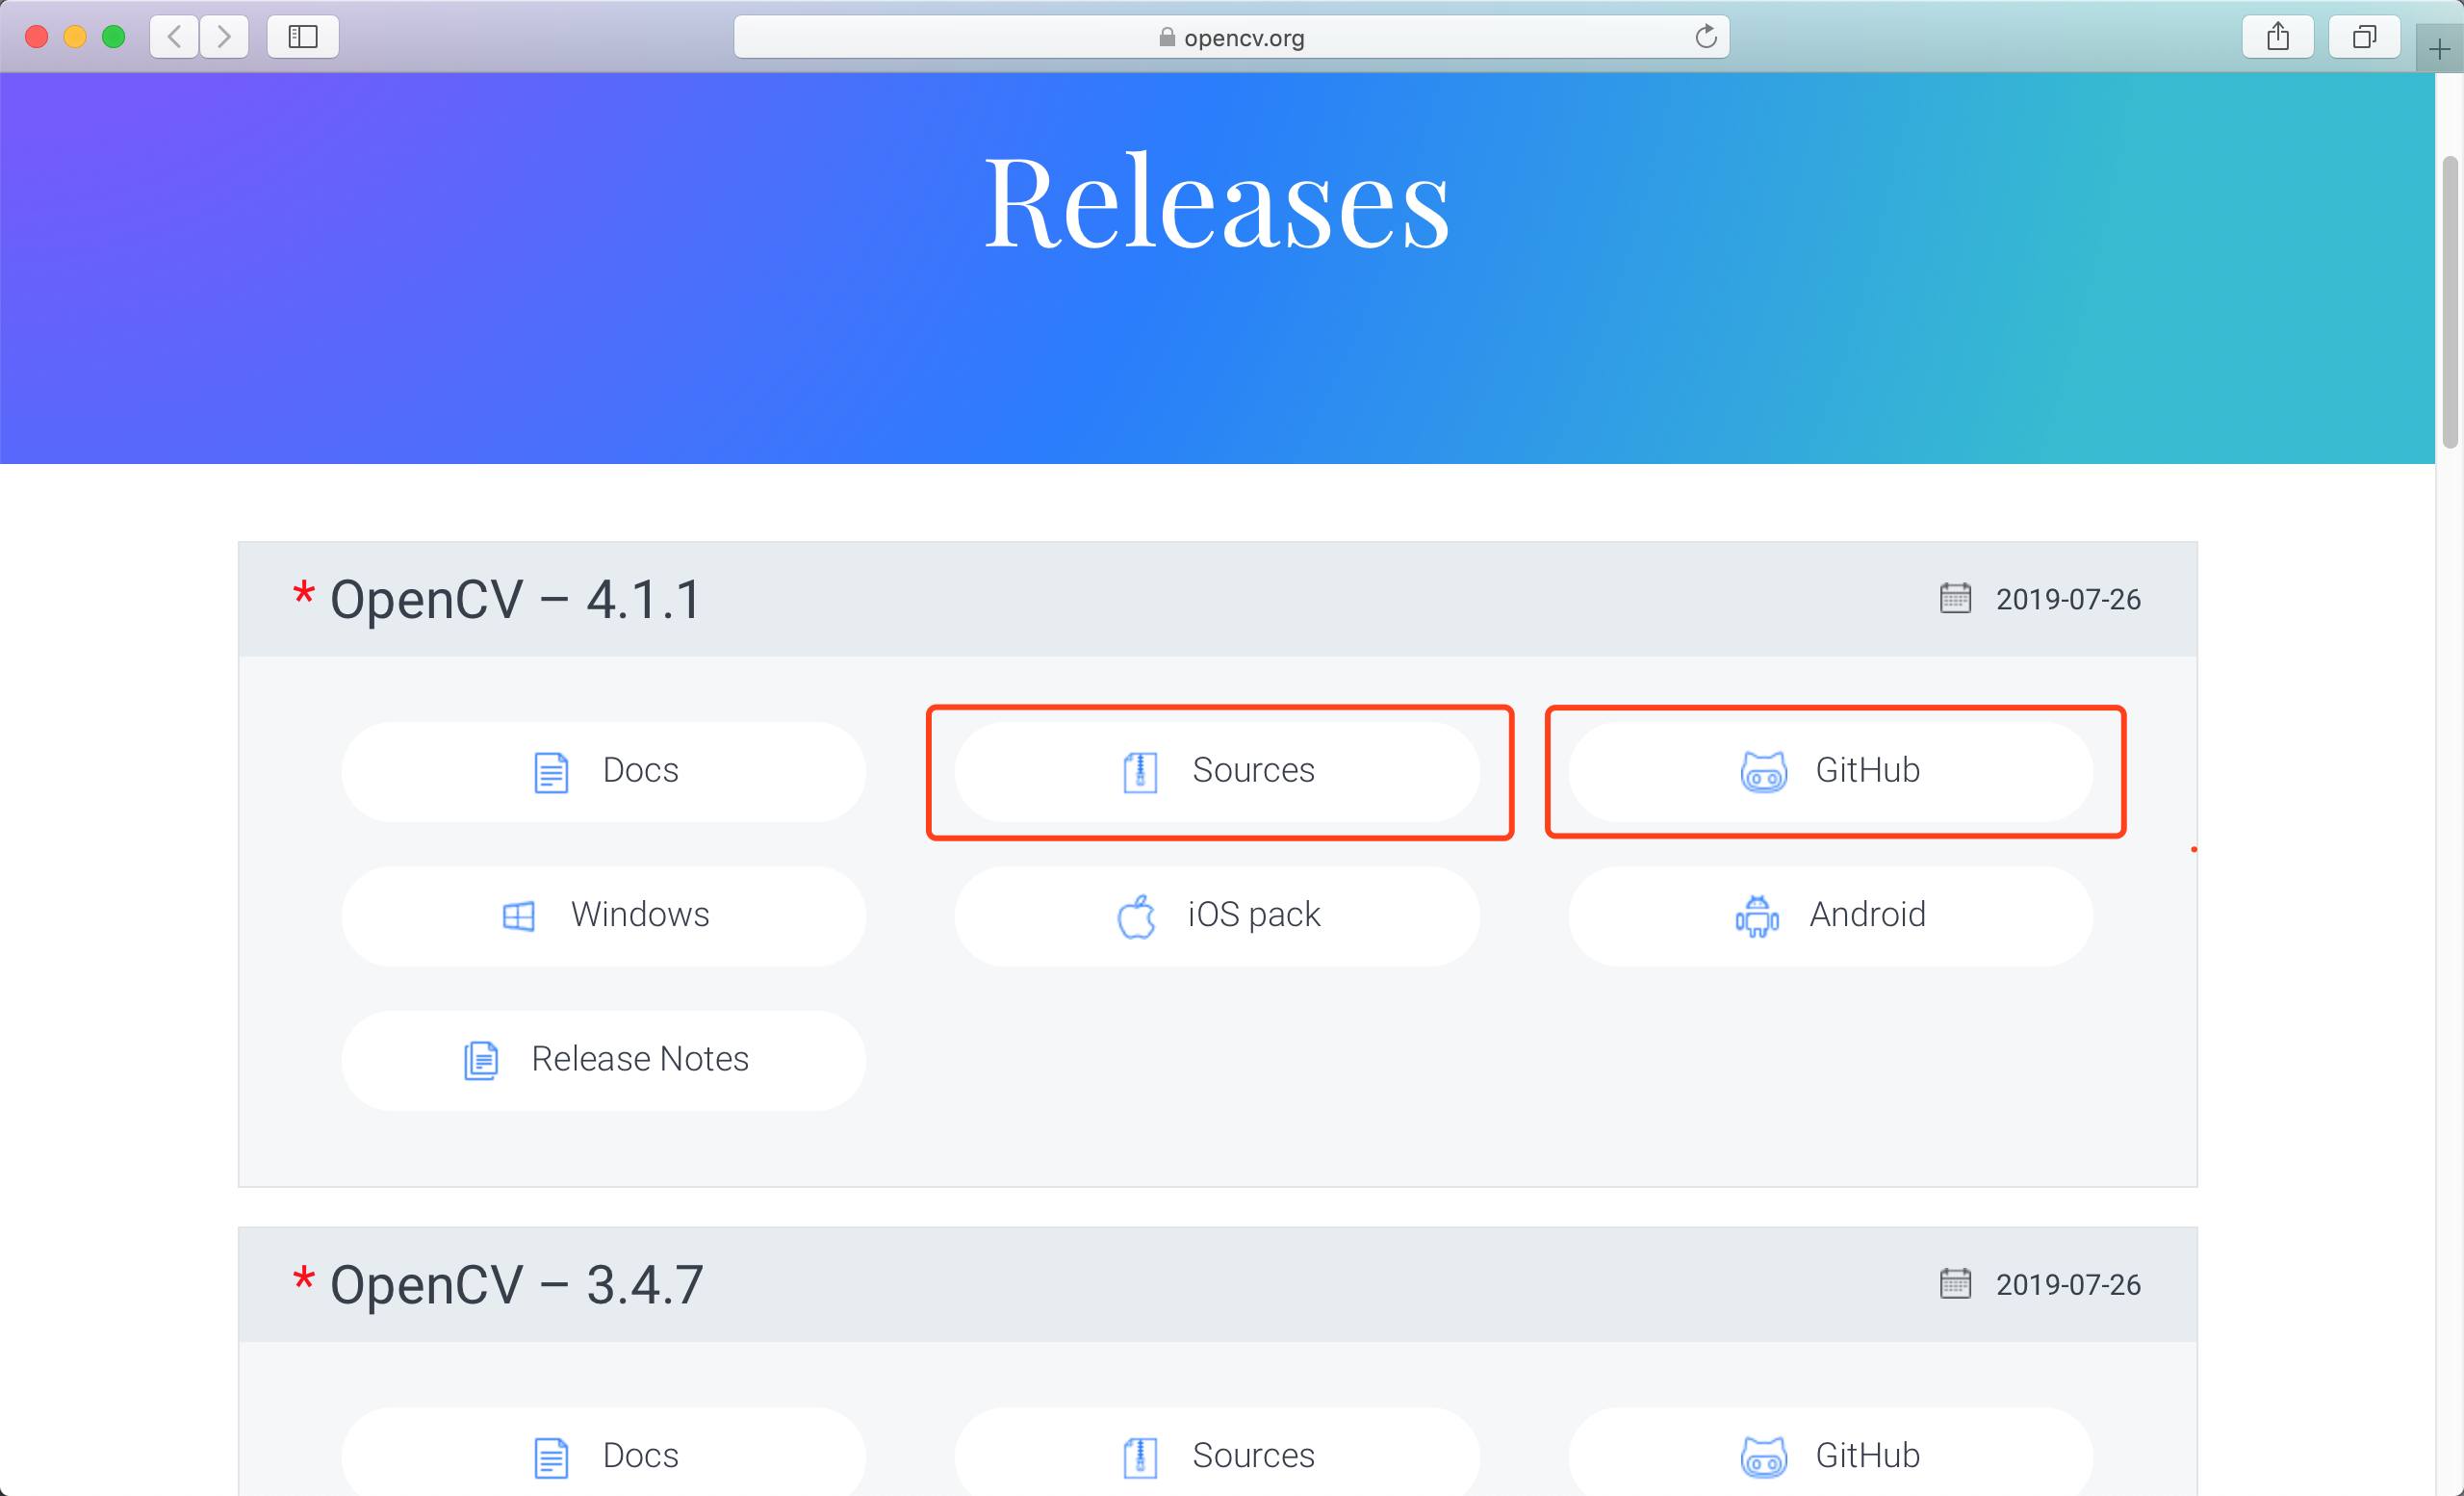

## 安装过程

- 安装过程如下：（需要安装C++编译器环境与make工具，cmake工具）
    1. 解压；
    2. 进入解压目录，创建build目录；
    3. 进入build的目录
    4. 执行`cmake ..`命令
    5. 执行`make`命令
    6. 执行`make install`命令

- 安装后的路径确认：
    - 在安装完毕的输出中，可以看见安装的路径。
        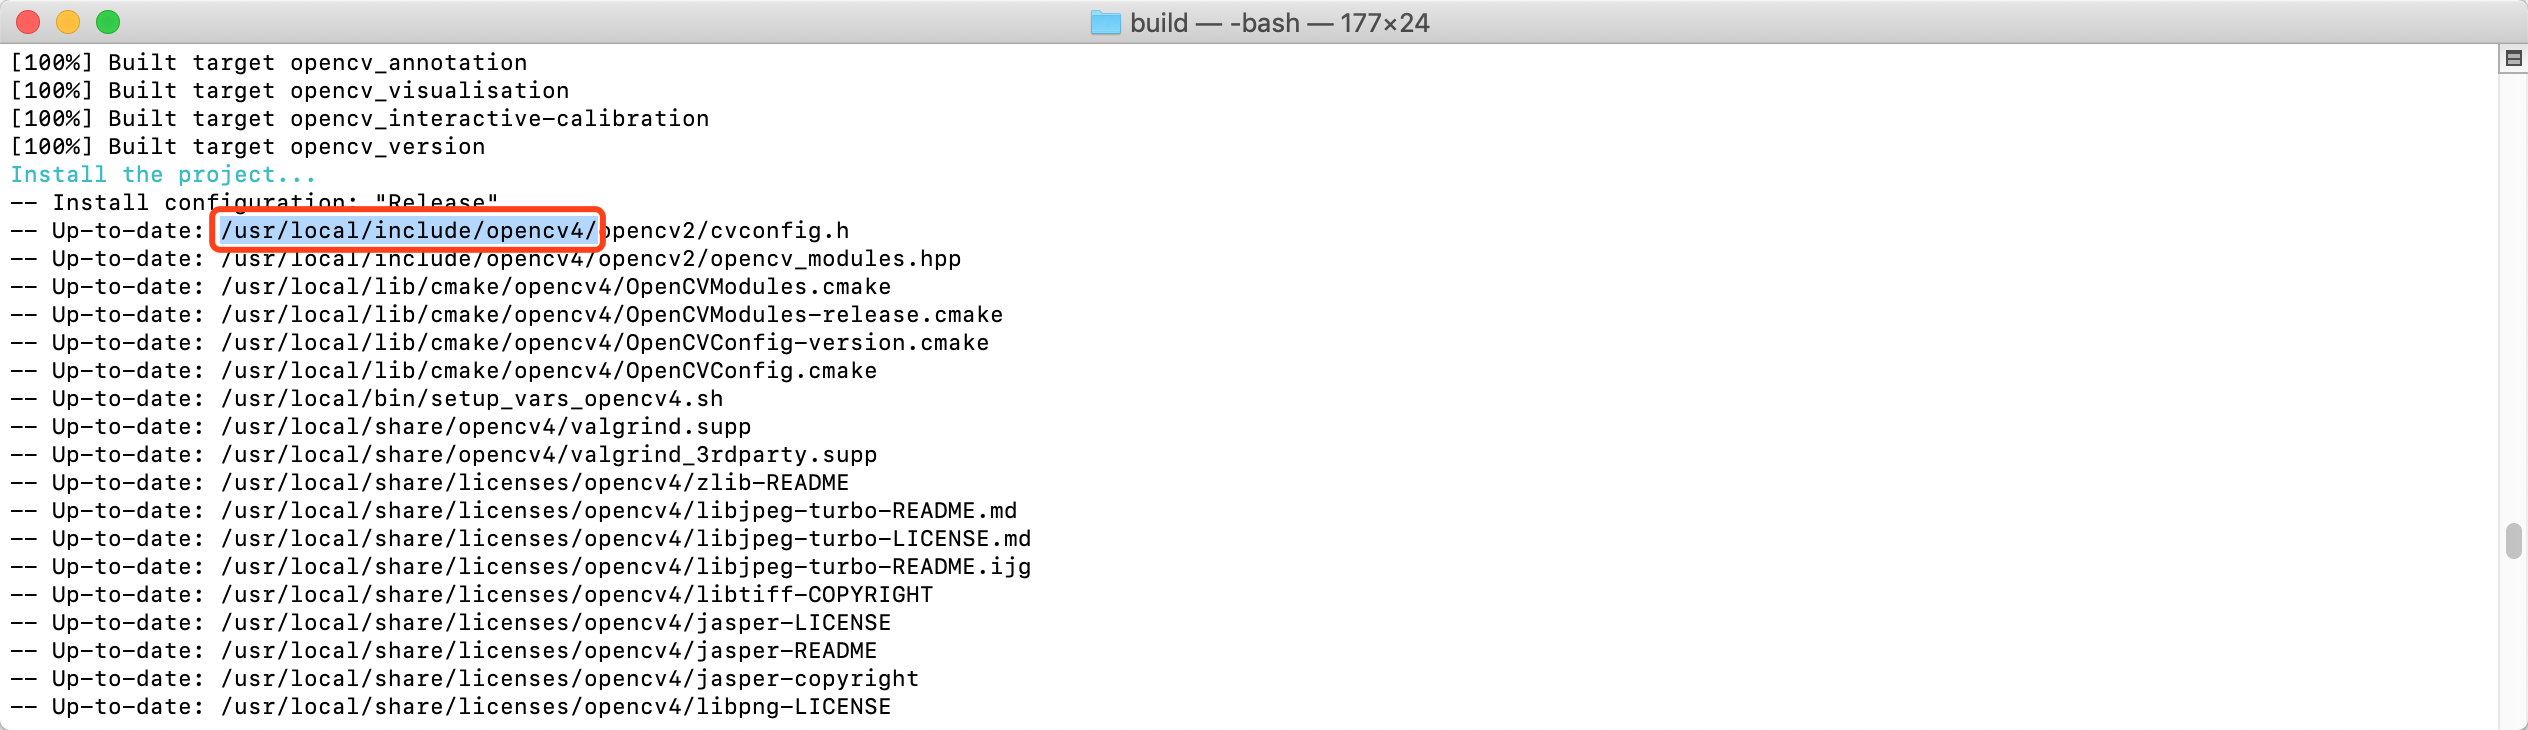

# 在VSCode下的配置

- 需要配置include，否则语法全是波浪线。include的配置两种方式：
    1. 全局方式，直接利用编译器自己的环境变量；
    2. 局部方式，利用VSCode的环境变量；
- 需要配置静态或者动态库（可选），因为我没有使用VSCode的编译环境，使用的是公共命令行，或者cmake方式。

## VSCode的配置方式

1. 使用Ctrl（Mac 是Command键） +  shift  +  P，调出配置查找视图，使用C/C++找到需要配置的选项。
    - C/C++两个配置（通用属性配置与UI配置）
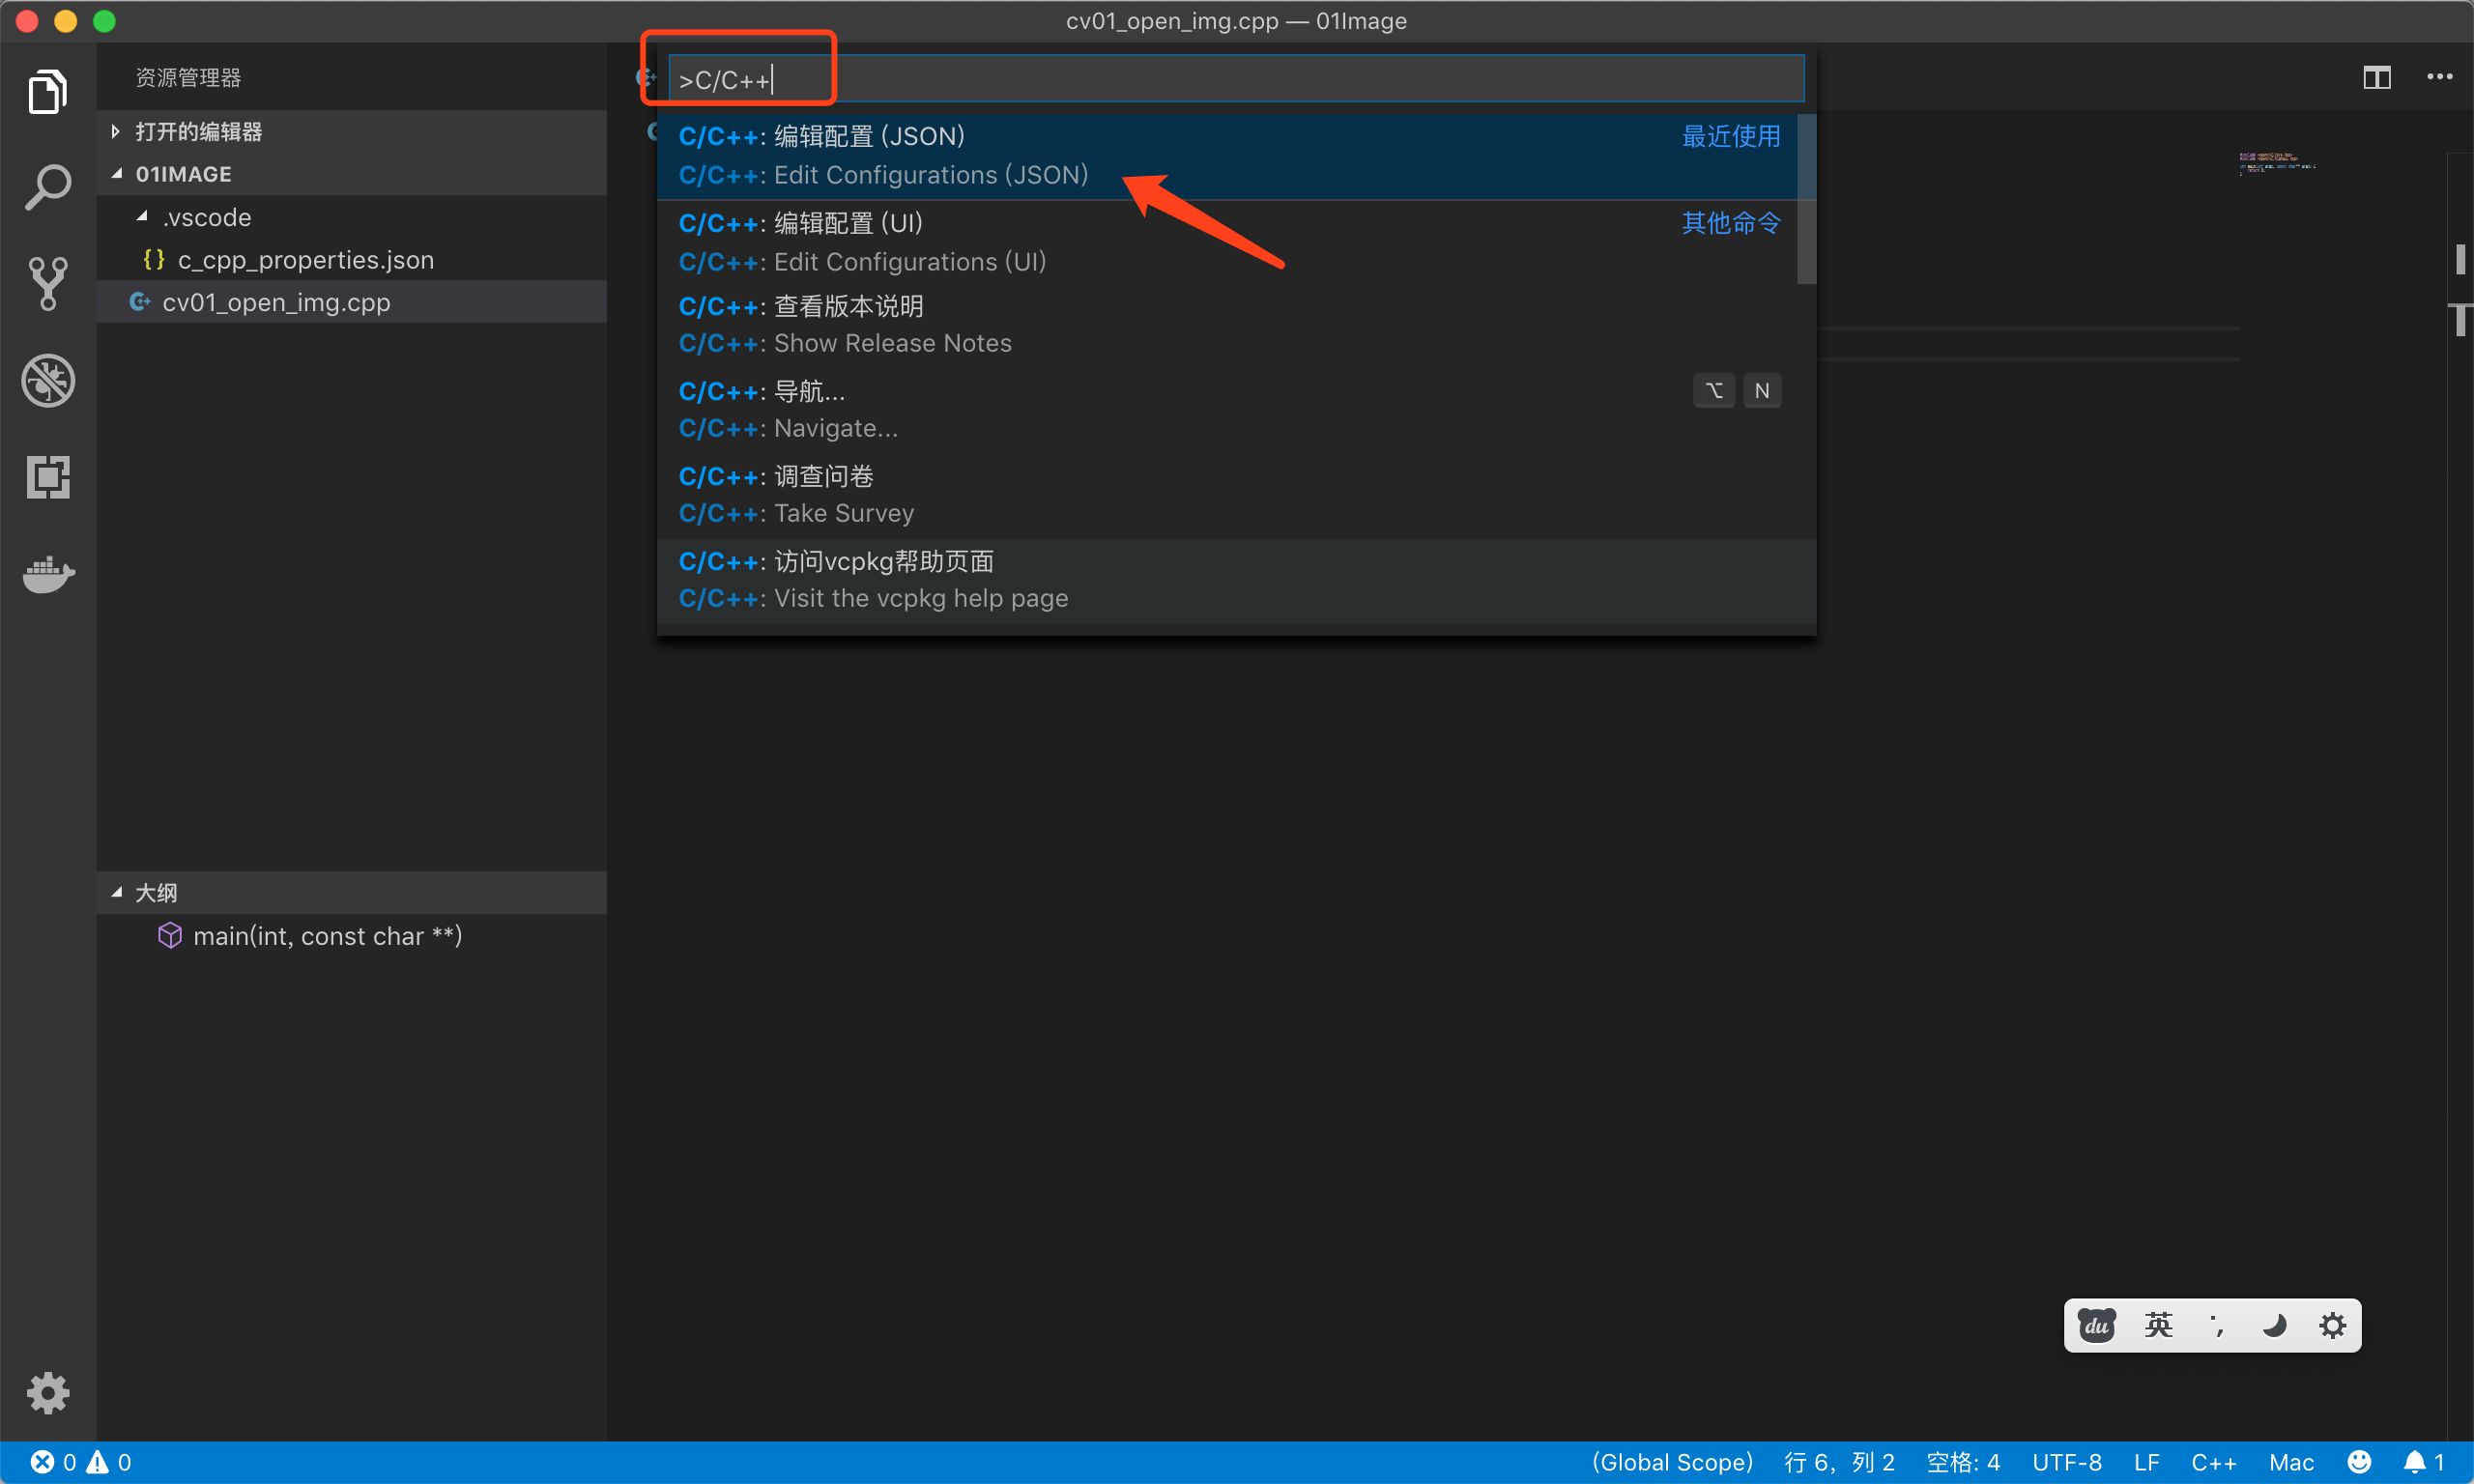

2. 打开json的属性配置，添加include的路径即可；
    - 配置include
        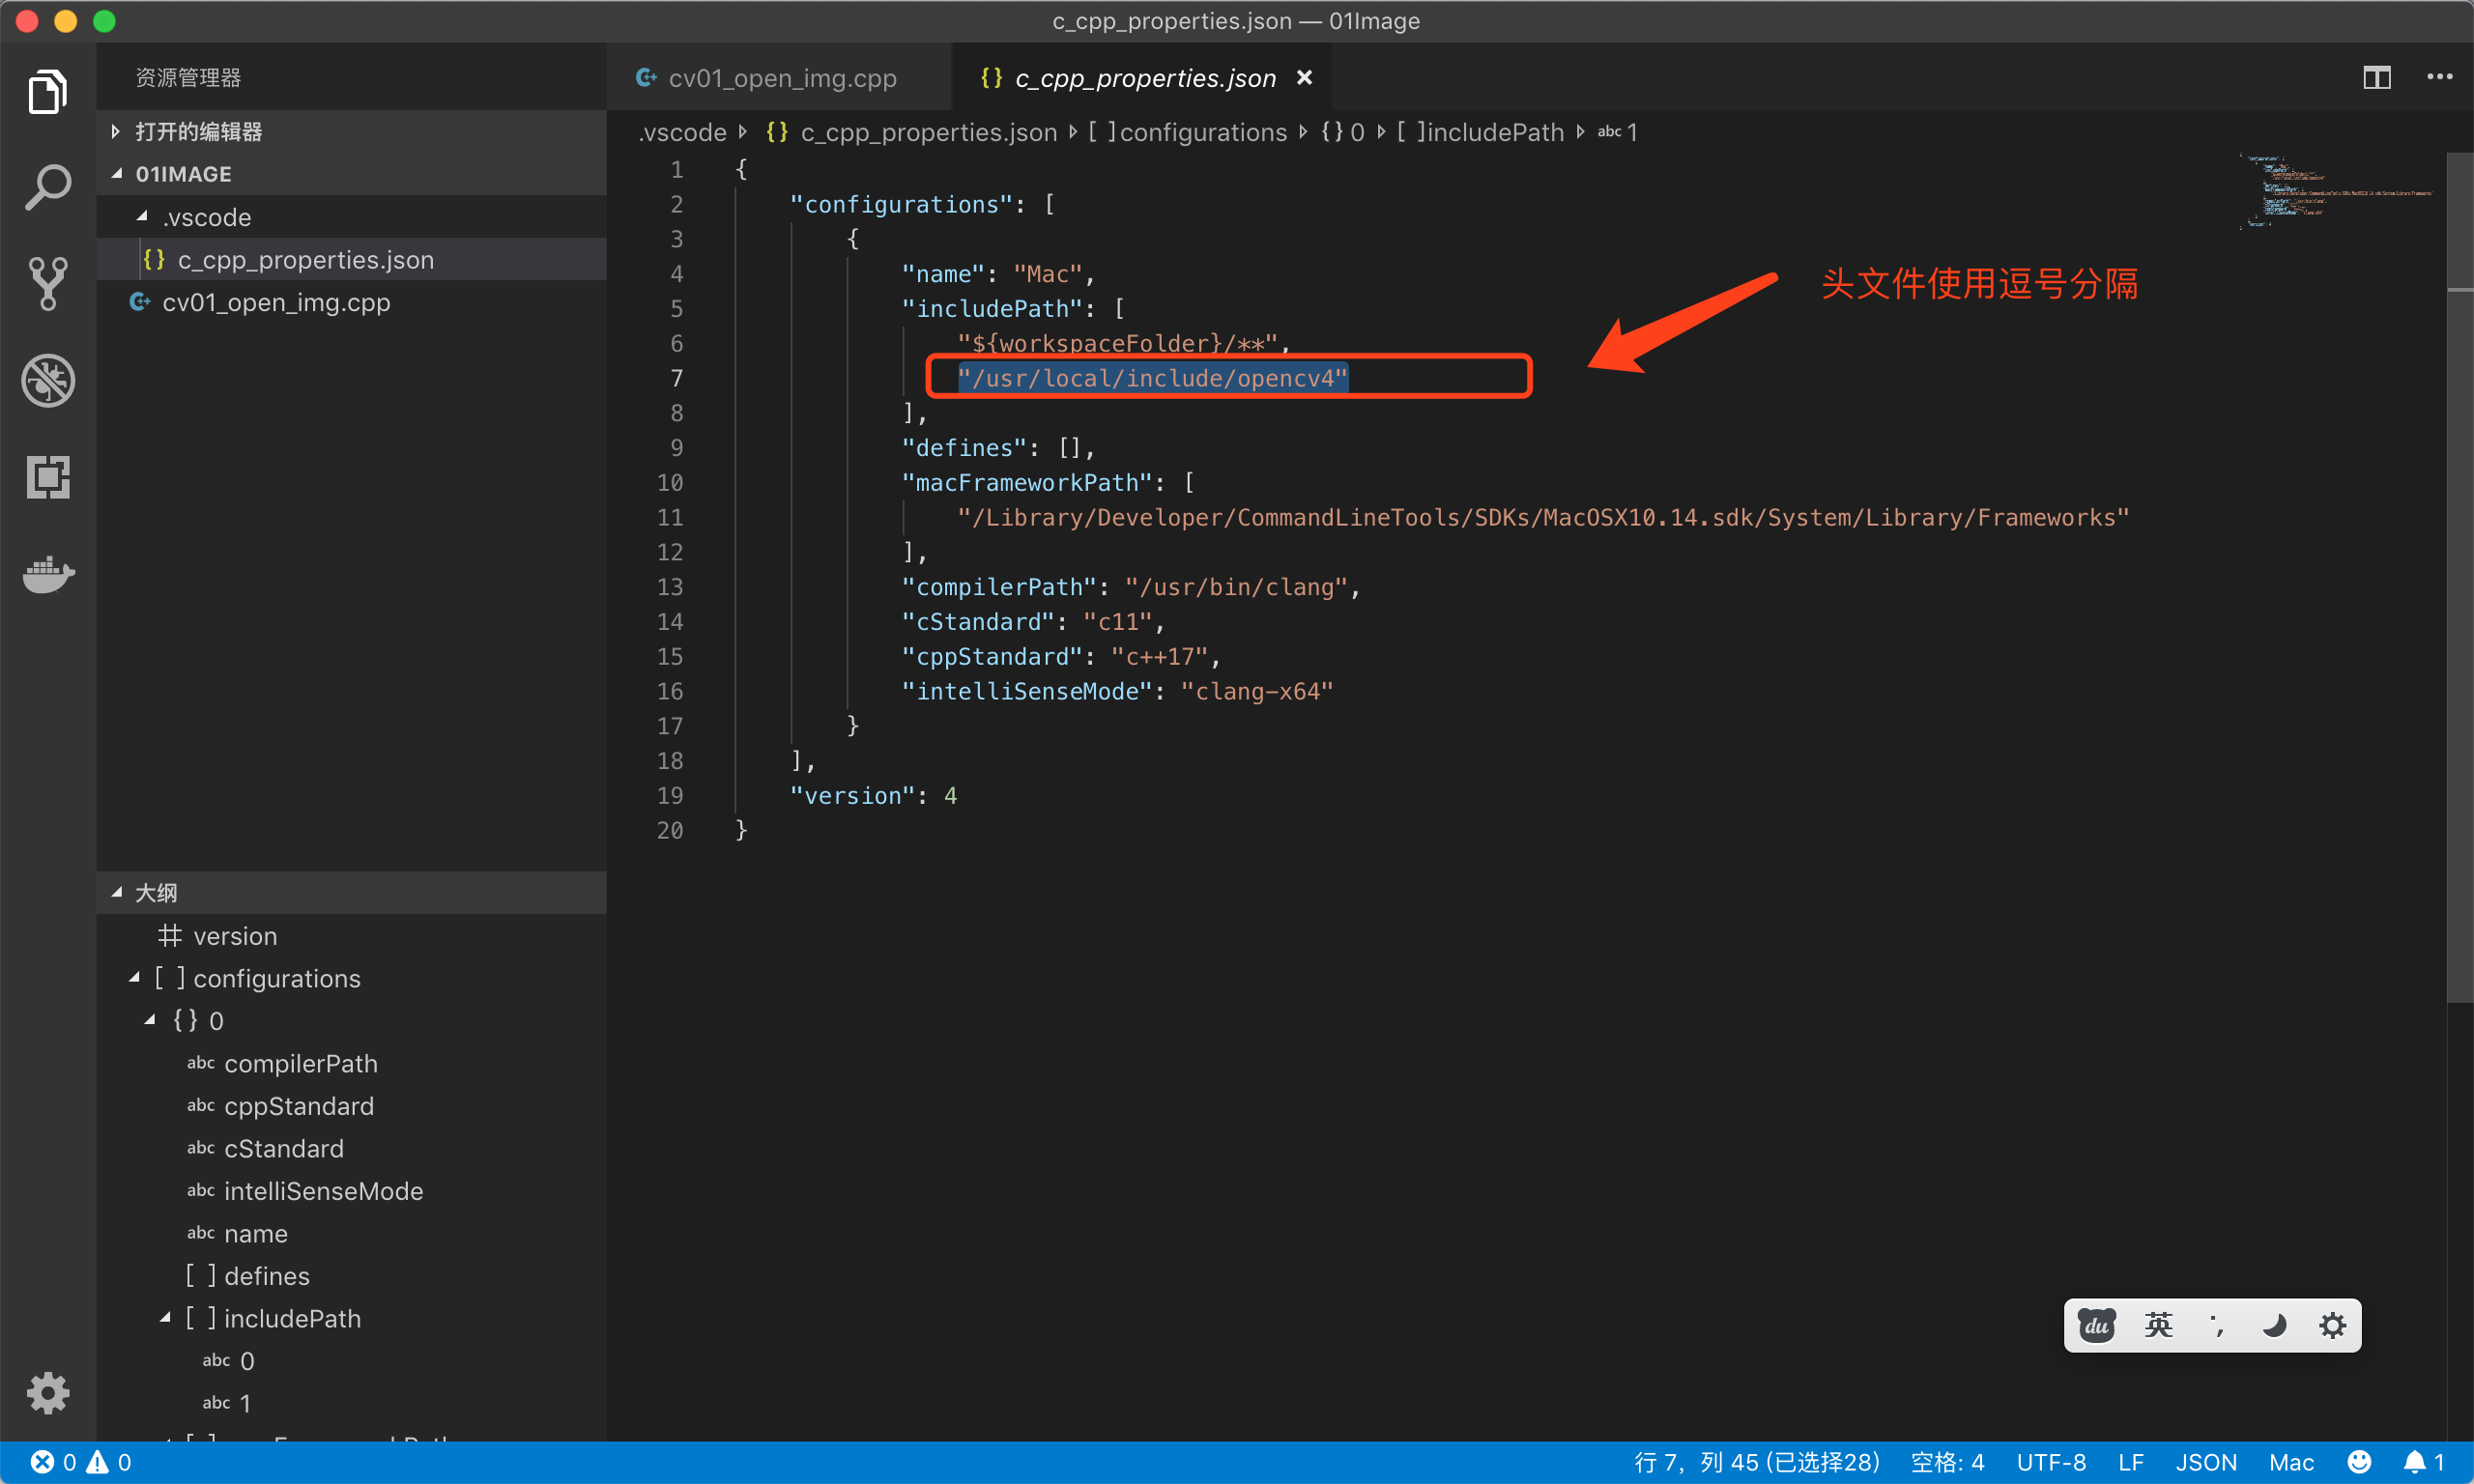

## 常见的动态库

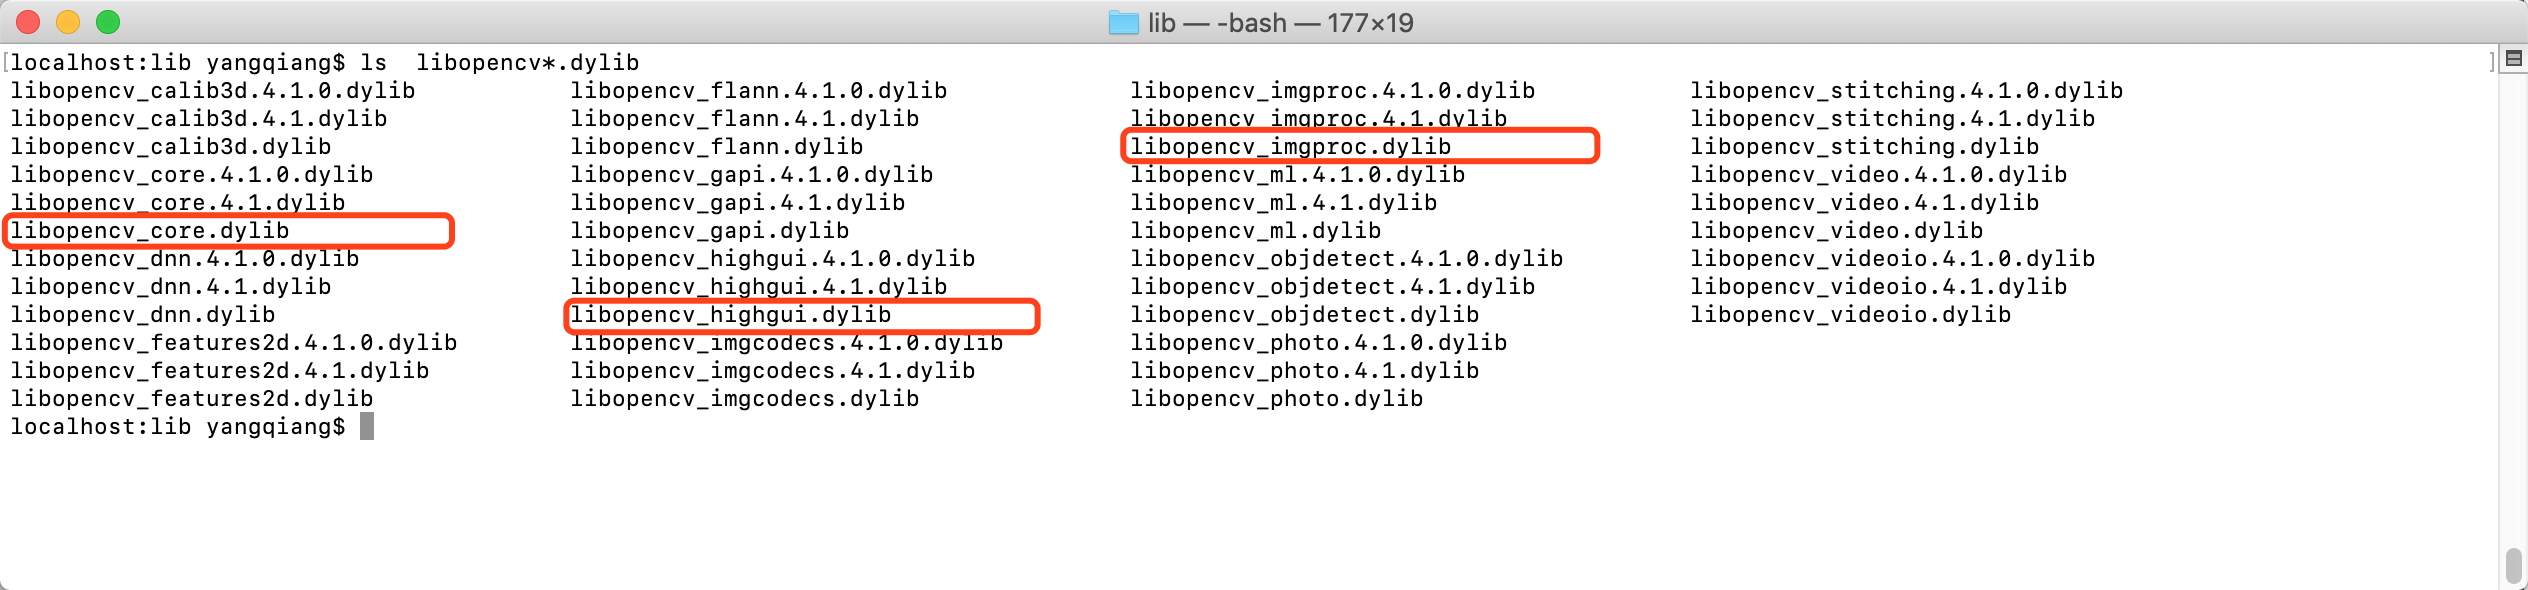

## 配置编译器include参数

- C/C++编译器环境参数设置：
    - C_INCLUDE_PATH（C语言）
    - CPLUS_INCLUDE_PATH（C++语言）
    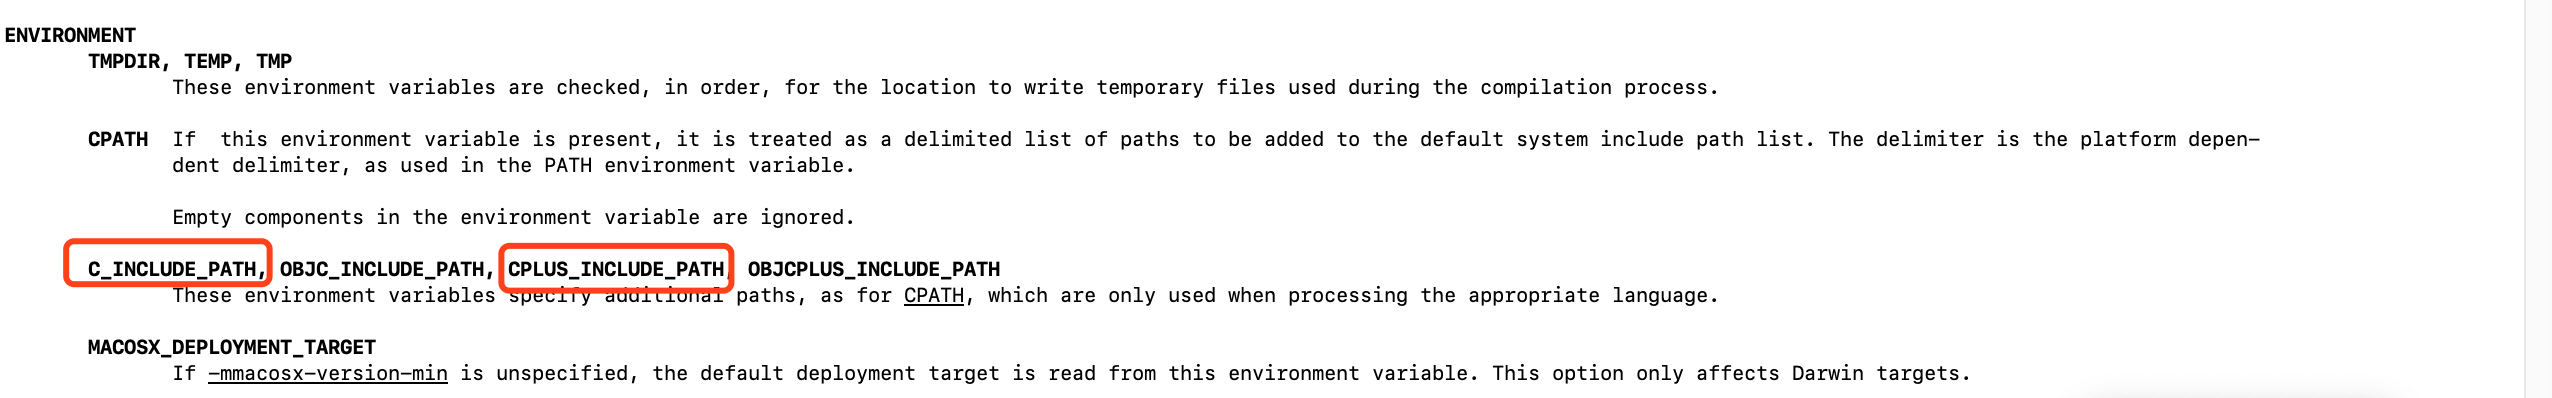

- 配置方式：
    - 使用系统与用户环境变量配置：
        - `export CPLUS_INCLUDE_PATH=$CPLUS_INCLUDE_PATH$:/usr/local/include/opencv4/`

# 开发opencv的编译命令行

- 因为opencv4要求C++11以上标准，所以需要开启C++11的标准。
    - 本机支持的C版本如下，个人环境可以直接查看。
        - 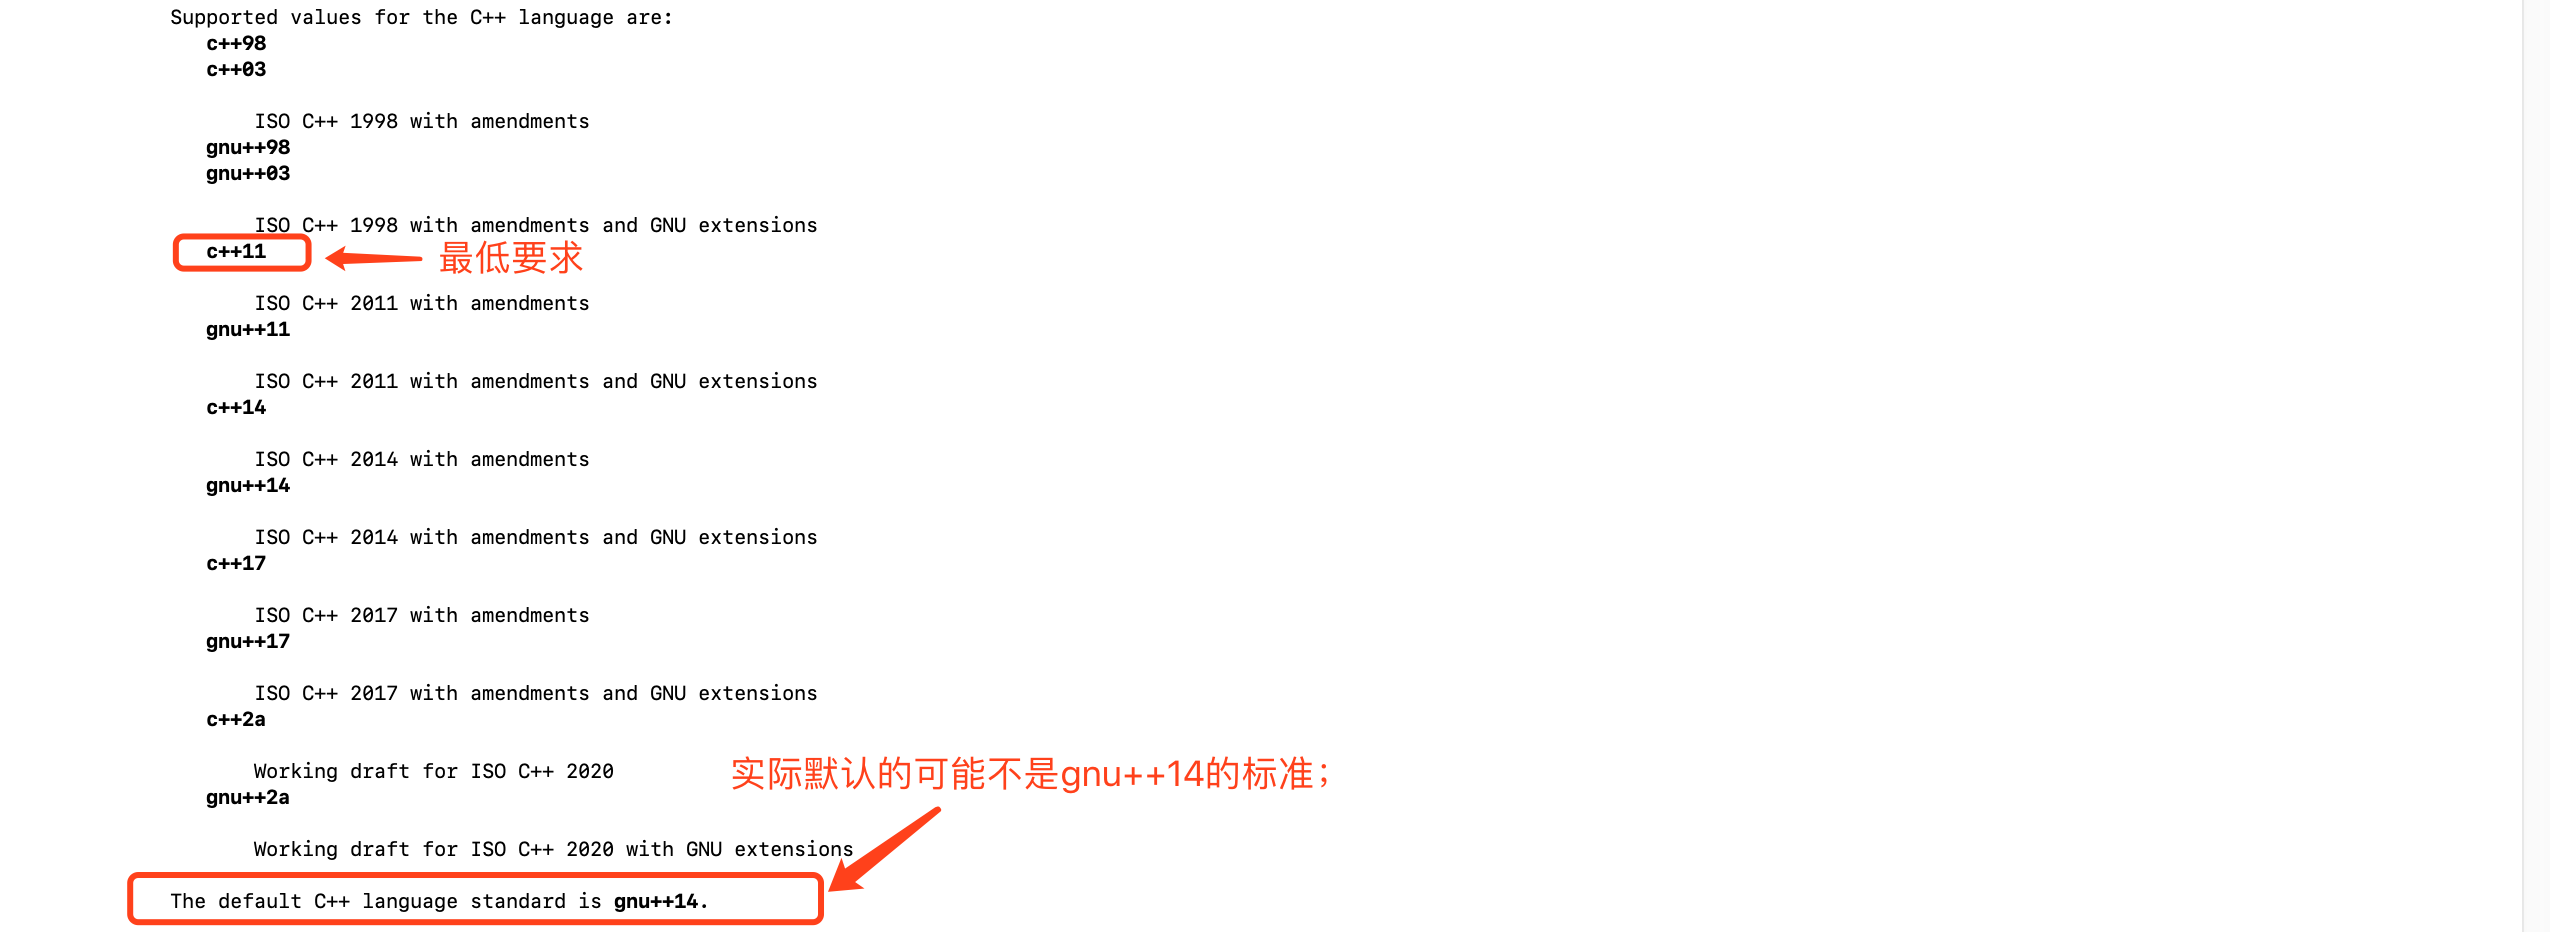

## 程序代码

```C++


#include <opencv2/opencv.hpp>
#include <iostream>

int main(int argc, const char** argv) {
    // 创建一个图像矩阵
    cv::Mat image;
    // 读取图像数据到图像矩阵
    image = cv::imread("cv4.png");   //cv::IMREAD_COLOR
    // 图像像素处理
    std::cout   << "图像大小：（" 
                << image.rows << "," 
                << image.cols << "）" 
                << std::endl;
    std::cout<< "图像深度：" << image.channels() << std::endl;
    for(int y = 0; y < image.rows; y++){        // 图像的格式是：高y宽x
        for(int x = 0; x < image.cols; x++){
            image.at<cv::Vec3b>(y, x)[0] = 0;     // 蓝色通道修改为0
            image.at<cv::Vec3b>(y, x)[1] = 0;     // 绿色通道修改为0
            // image.at<cv::Vec3b>(x, y)[2] = 0;  // 红色通道的值不变化
        }
    }
    // 显示处理后的图像
    cv::namedWindow("图像显示");
    cv::imshow("图像显示",image);
    cv::waitKey(0); // 防止程序结束导致窗体关闭
    return 0;
}

// 编译指令： g++ -omain  cv01_open_img.cpp -std=c++11 -I/usr/local/include/opencv4/ -lopencv_core -lopencv_highgui -lopencv_imgcodecs


```

## 编译命令行

```bash
    g++  -omain  cv01_open_img.cpp 
            -std=c++11 
            -I/usr/local/include/opencv4/ 
            -lopencv_core 
            -lopencv_highgui 
            -lopencv_imgcodecs
```

- 链接程序需要用到三个动态库：
    - opencv_core 核心库
    - opencv_highgui GUI库
    - opencv_imgcodecs图像编码库

- 开启C++11标准
    - `-std=c++11`

- 编译需要的头文件目录：
    - `-I/usr/local/include/opencv4/`

----